<a href="https://colab.research.google.com/github/ej-emjiang/DIMe/blob/main/reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [1]:
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from datetime import date
import statsmodels.api as sm
import statistics
import math

In [2]:
def getZScore(mean, stdev, val):
    return ((val - mean)/stdev)

In [3]:
drive.mount('/content/gdrive', force_remount = True)
%cd /content/gdrive/My Drive/DIME/reddit

Mounted at /content/gdrive
/content/gdrive/My Drive/DIME/reddit


# Analyzing stats by day.

In [4]:
dailyData = pd.read_csv("stats by day.csv")
dailyData = dailyData.drop(["Campaign Name", "Ad Group Name", "Ad Name"], axis = 1)
dailyData['Date'] = pd.to_datetime(dailyData['Date'], yearfirst = True)
dailyData['Ordinal Date'] = dailyData['Date'].apply(lambda date: date.toordinal())
dailyData.head()

,Date,Impressions,eCPM,Clicks,CPC (USD),CTR,Amount Spent (USD),Ordinal Date
0,2022-10-20,8403,0.79,9,0.74,0.001071,6.664798,738448
1,2022-10-21,16872,1.06,26,0.69,0.001541,17.853675,738449
2,2022-10-22,13719,1.15,21,0.75,0.001531,15.795651,738450
3,2022-10-23,18522,0.98,24,0.76,0.001296,18.216373,738451
4,2022-10-24,18580,0.90,28,0.60,0.001507,16.758314,738452


Before getting into understanding any relationships with the data, we first make some elementary observations. Over this 30 day period, the mean for all of these metrics are as follows:

In [5]:
for col in dailyData.columns[1:-1]:
    print(f"{col}: {statistics.mean(dailyData[col])}", end = '. ')
    print(f"{col}: {statistics.stdev(dailyData[col])}")

Impressions: 20953. Impressions: 5187.1408744714945
eCPM: 0.8828125. eCPM: 0.1898935928695416
Clicks: 34.53125. Clicks: 7.799852666102304
CPC (USD): 0.535. CPC (USD): 0.10358104198194047
CTR: 0.0016678301505846094. CTR: 0.0002850231004586736
Amount Spent (USD): 17.8044944375. Amount Spent (USD): 2.849392125801209


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)
<ipython-input-6-3baf06aa0794>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),


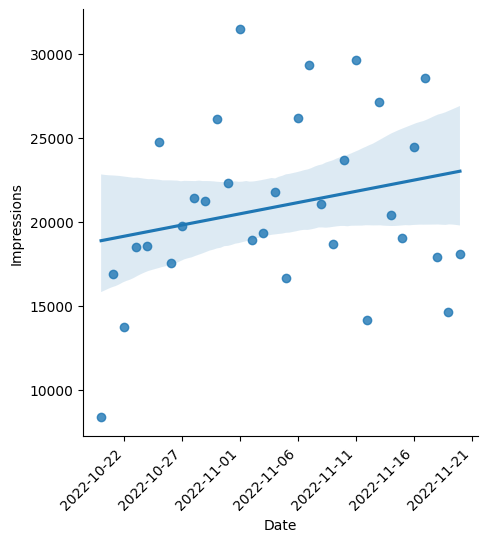

In [6]:
# https://medium.com/@alex.kirkup/seaborn-doesnt-like-dates-using-date-ordinals-instead-36f7ad4900d9
ax = sns.lmplot(data = dailyData, x = "Ordinal Date", y = "Impressions");
ax.set(xlabel = "Date", xticklabels = [date.fromordinal(int(item)) for item in
                                       ax.axes[0, 0].get_xticks()]);

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),
                              rotation = 45,
                              horizontalalignment = 'right');



In [7]:
# https://datatofish.com/statsmodels-linear-regression/

x = dailyData[["Ordinal Date", "Amount Spent (USD)"]]
y = dailyData["Impressions"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Impressions   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4.201
Date:                Wed, 26 Jul 2023   Prob (F-statistic):             0.0250
Time:                        13:58:12   Log-Likelihood:                -314.55
No. Observations:                  32   AIC:                             635.1
Df Residuals:                      29   BIC:                             639.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.758e+07   6.73

The important numbers to look at in the above output are the numbers in the table in the middle. In the row labeled "Amount Spent (USD)", we observe that the column "P > |t|" has a value of 0.019, meaning there is a 1.9% chance that the relationship between amount spent, and the number of ad impressions on the given day, is by random chance.

It is standard for percentages less than 5% to be deemed "statistically significant", so the above linear regression model suggests there is no significant relationship between day and impressions on that day.

Overall, this model predicts that for every dollar spent, the number of impressions increases by 748. From the "R-squared" value found in the top left of the output, this number suggests that amount spent on advertising explains 22.5% of the variance in impressions.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)
<ipython-input-8-0e7fd6146f99>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),


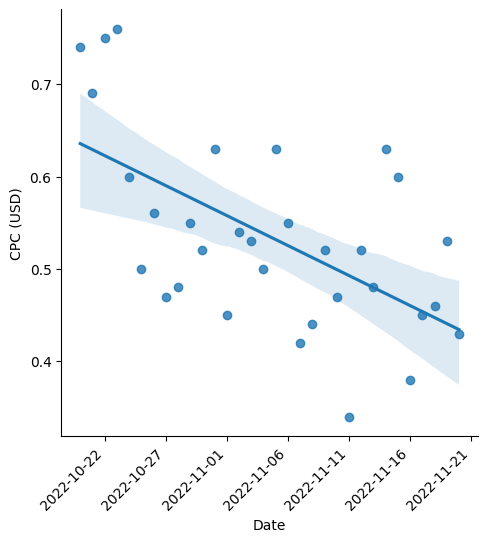

In [8]:
ax = sns.lmplot(data = dailyData, x = "Ordinal Date", y = "CPC (USD)");
ax.set(xlabel = "Date", xticklabels = [date.fromordinal(int(item)) for item in
                                       ax.axes[0, 0].get_xticks()]);

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),
                              rotation = 45,
                              horizontalalignment = 'right');

In [9]:
x = dailyData["Ordinal Date"]
y = dailyData["CPC (USD)"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              CPC (USD)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     15.88
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           0.000398
Time:                        13:58:13   Log-Likelihood:                 34.455
No. Observations:                  32   AIC:                            -64.91
Df Residuals:                      30   BIC:                            -61.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4797.2994   1203.854      3.985   

"CPC" stands for cost per click. Reviewing the same numbers as mentioned earlier, this test suggests that there is a near-0 percent chance that the relationship between date and CPC is by random chance.

This model suggests that for every day further in this 30 day period, the CPC decreases by 0.0064 USD. The date explains for 32.4% of the variance in CPC.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)
<ipython-input-10-cc3ddf3d28b3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),


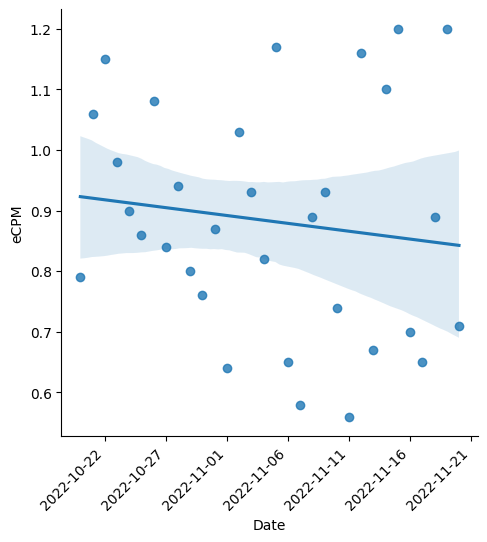

In [10]:
ax = sns.lmplot(data = dailyData, x = "Ordinal Date", y = "eCPM");
ax.set(xlabel = "Date", xticklabels = [date.fromordinal(int(item)) for item in
                                       ax.axes[0, 0].get_xticks()]);

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),
                              rotation = 45,
                              horizontalalignment = 'right');

In [11]:
x = dailyData["Ordinal Date"]
y = dailyData["eCPM"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   eCPM   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5007
Date:                Wed, 26 Jul 2023   Prob (F-statistic):              0.485
Time:                        13:58:13   Log-Likelihood:                 8.5281
No. Observations:                  32   AIC:                            -13.06
Df Residuals:                      30   BIC:                            -10.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1916.0695   2706.721      0.708   

"eCPM" stands for "effective cost per mille (1000)". This is a metric to predict ad revenue for gained from every 1000 impressions (my understanding is that this information is more useful for Reddit, than the organization paying for advertising). While graphically, there appears to be a negative relationship between date and eCPM, this output suggests that there is a 48.5% chance this relationship appeared by random chance, meaning there is insignificant evidence to suggest a real relationship.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)
<ipython-input-12-27c513ccb7df>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),


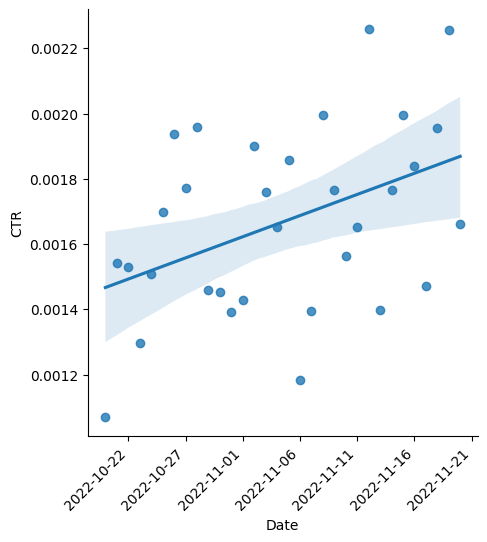

In [12]:
ax = sns.lmplot(data = dailyData, x = "Ordinal Date", y = "CTR")
ax.set(xlabel = "Date", xticklabels = [date.fromordinal(int(item)) for item in
                                       ax.axes[0, 0].get_xticks()]);

ax.axes[0, 0].set_xticklabels(ax.axes[0, 0].get_xticklabels(),
                              rotation = 45,
                              horizontalalignment = 'right');

In [13]:
x = dailyData[["Ordinal Date", "Amount Spent (USD)"]]
y = dailyData["CTR"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     5.180
Date:                Wed, 26 Jul 2023   Prob (F-statistic):             0.0119
Time:                        13:58:14   Log-Likelihood:                 221.20
No. Observations:                  32   AIC:                            -436.4
Df Residuals:                      29   BIC:                            -432.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.7671      3

"CTR" stands for "click through rate", represents the rate at which people actually click on the advertisement. There's evidence of a significant relationship between CTR and time, however, the associated coefficient with how date corresponds to CTR is near 0.

# Analyzing city data

Observing the city data, there isn't much evidence of a significant relationship between city and any of the relevant metrics of advertisement success. Below is a bar graph demonstrating how click through rate only appears to be high for some cities because there were very few impressions in that city.

We note that in the below bar graph, only cities where a non-zero amount of money was invested in advertising are graphed.

In [14]:
cityData = pd.read_csv("stats by city.csv")
cityData = cityData.drop(["Campaign Name", "Ad Group Name", "Ad Name"], axis = 1)
cityData["Amount Spent (USD)"] = cityData["Amount Spent (USD)"].apply(lambda x: float(x))

cityData.iloc[0, 0] = "Total"
cityData.head()

,DMA,Impressions,eCPM,Clicks,CPC (USD),CTR,Amount Spent (USD)
0,Total,653256,0.83,1074,0.51,0.001644,542.61831
1,"Portland-Auburn, ME",62,0.00,0,0.00,0.000000,0.00000
2,"New York, NY",941,2.05,2,0.97,0.002125,1.93150
3,"Binghamton, NY",6,0.00,0,0.00,0.000000,0.00000
4,"Macon, GA",14,0.00,0,0.00,0.000000,0.00000


<ipython-input-15-ce4b76713fab>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.barplot(data = cityData[1:][cityData["Amount Spent (USD)"] > 0], x = "DMA", y = "CTR")


0.011785317463807241 0.013297130274096897
City: Columbia, SC. Impressions: 39
City: Chattanooga, TN. Impressions: 36
City: Harlingen-Weslaco-Brownsville-McAllen, TX. Impressions: 32
City: Lincoln & Hastings-Kearney, NE. Impressions: 46
City: Anchorage, AK. Impressions: 53


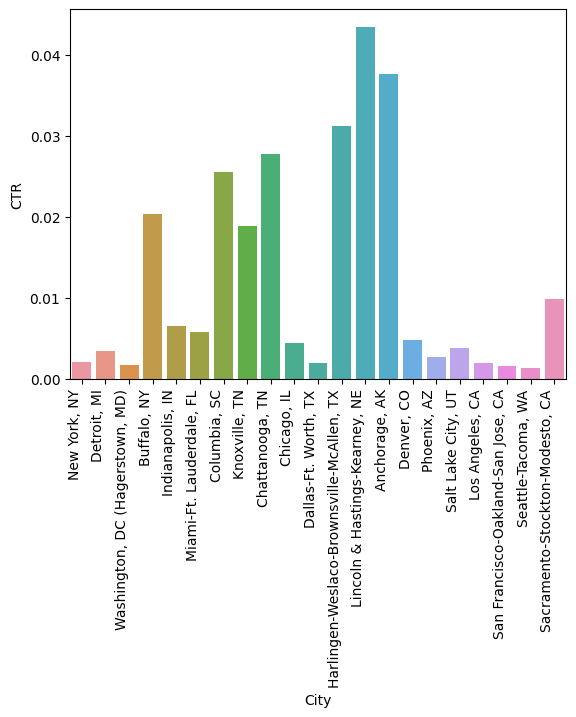

In [15]:
ax = sns.barplot(data = cityData[1:][cityData["Amount Spent (USD)"] > 0], x = "DMA", y = "CTR")

ax.set(xlabel = "City")
ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

stdev = statistics.stdev(cityData[cityData["Amount Spent (USD)"] > 0]["CTR"])
mean = statistics.mean(cityData[cityData["Amount Spent (USD)"] > 0]["CTR"])
print(mean, stdev)
for i in range(1, len(cityData)):
    if (cityData.iloc[i]["CTR"] > mean + stdev):
        print(f"City: {cityData.iloc[i]['DMA']}. Impressions: {cityData.iloc[i]['Impressions']}")

# Analyzing interest data

In [16]:
interestData = pd.read_csv("stats by interest.csv")
interestData = interestData.drop(["Campaign Name", "Ad Group Name", "Ad Name"], axis = 1)
interestData["Amount Spent (USD)"] = interestData["Amount Spent (USD)"].apply(lambda x: float(x))

The following bar graphs are an attempt to assuage any significant difference in relevant factors to advertising success between "interests" (as grouped by Reddit). The interests that will be noted are interests whose value in the observed factor is one or more standard deviations above the mean. When normalizing this data through transformations, then converting this transformed data into Z-scores, the information that a piece of data is above X many standard deviations from the mean represents the following:

1 standard deviation above the mean: 68th percentile of the data
2 standard deviations above the mean: 95th percentile of the data
3 standard deviations above the mean: 99.7th percentile of the data





## Impressions

In [17]:

interestZScore = pd.DataFrame(data = interestData["Interest"], columns = ["Interest"])


interestData.head()

,Interest,Impressions,eCPM,Clicks,CPC (USD),CTR,Amount Spent (USD)
0,animation_v2,150028,0.78,225,0.52,0.001500,116.696304
1,baseball_v2,24756,0.98,39,0.62,0.001575,24.353416
2,basketball_v2,78341,0.85,125,0.53,0.001596,66.859646
3,college_sports_v2,91674,0.84,148,0.52,0.001614,77.173156
4,comedy_v2,85981,0.77,128,0.52,0.001489,66.374355


Mean # of impressions: 223842.92857142858. Standard deviation: 205574.28313726917


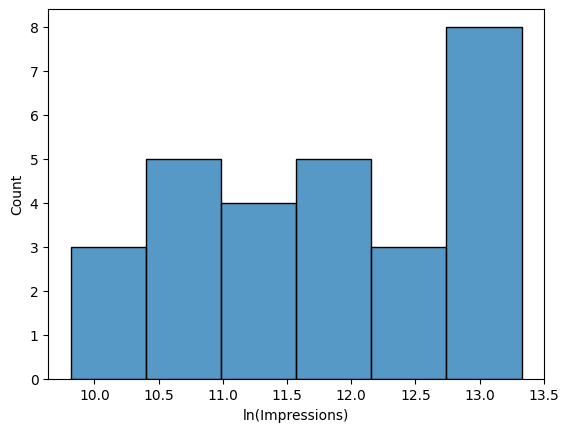

In [18]:
interestData["ln(Impressions)"] = interestData["Impressions"].apply(math.log)

stdev = statistics.stdev(interestData["ln(Impressions)"])
mean = statistics.mean(interestData["ln(Impressions)"])

print(f"Mean # of impressions: {statistics.mean(interestData['Impressions'])}. Standard deviation: {statistics.stdev(interestData['Impressions'])}")

interestZScore["Impressions"] = interestData["ln(Impressions)"].apply(
    lambda x: getZScore(mean, stdev, x))

ax = sns.histplot(data = interestData, x = "ln(Impressions)")



Interest: entertainment_v2. Impressions: 596129 Cost: 515.207667
Interest: humor_v2. Impressions: 614187 Cost: 525.98232
Interest: literature_v2. Impressions: 535071 Cost: 467.698987
Interest: movies_v2. Impressions: 414145 Cost: 382.036012
Interest: pc_games_v2. Impressions: 434267 Cost: 389.350427
Interest: reddit_meta_v2. Impressions: 594955 Cost: 511.6708
Interest: video_gaming_v2. Impressions: 562149 Cost: 482.694264
{'video_gaming_v2', 'humor_v2', 'pc_games_v2', 'literature_v2', 'reddit_meta_v2', 'entertainment_v2', 'movies_v2'}


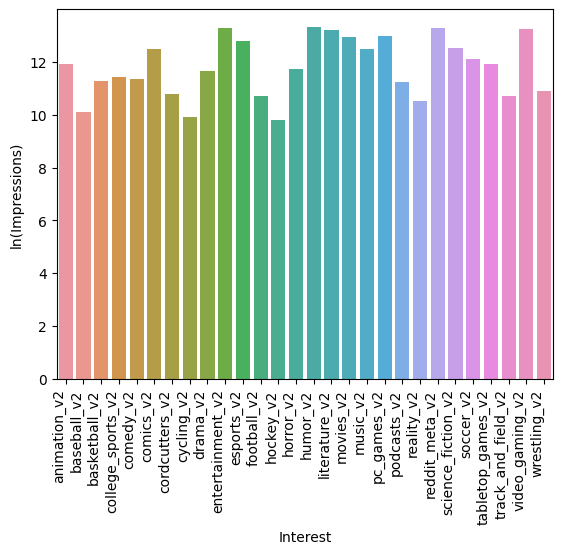

In [19]:
ax = sns.barplot(data = interestData, x = "Interest", y = "ln(Impressions)")

ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

lnImpressionSet = set()
# print(mean, stdev)
coeff = 1 # 1 ~ 68 percentile, 2 ~ 95 percentile, 3 ~ 99.7 percentile
for i in range(0, len(interestData)):
    if (interestZScore.iloc[i]["Impressions"] > coeff):
        print(f"Interest: {interestData.iloc[i]['Interest']}.", end = ' ')
        print(f"Impressions: {interestData.iloc[i]['Impressions']}", end = ' ')
        print(f"Cost: {interestData.iloc[i]['Amount Spent (USD)']}")
        lnImpressionSet.add(interestData.iloc[i]['Interest'])
print(lnImpressionSet)

First, looking at the number of impressions given an interest, we perform a logarithmic transformation after observing a strong right skewness in the data. Looking only at interests whose ln(impressions) is 1 standard deviation above the mean, these interests are:

* Entertainment | 596,129 Impressions | 515.21 USD
* Humor | 614,187 Impressions | 525.98 USD
* Literature | 535,071 Impressions | 467.70 USD
* Movies | 414,145 Impressions | 382.04 USD
* PC games | 434,267 Impressions | 389.35 USD
* "Reddit Meta" | 594,955 Impressions | 511.67 USD
* Video Gaming | 596,129 Impressions | 515.21 USD

Earlier, we observed a significant relationship between cost of advertising, and the number of impressions. Considering this, we draw attention to **literature, movies, and PC games** for having high numbers of impressions despite having a relatively lower cost of advertising. However, because being higher than 1 standard deviation above the mean is only indicative of being beyond roughtly the 68th percentile, this is not a large relationship between literature and number of impressions.

## Cost Per Click

Mean cost per click (USD): 0.5421428571428571. Standard deviation: 0.04863752117047563


<Axes: xlabel='ln(CPC+1)', ylabel='Count'>

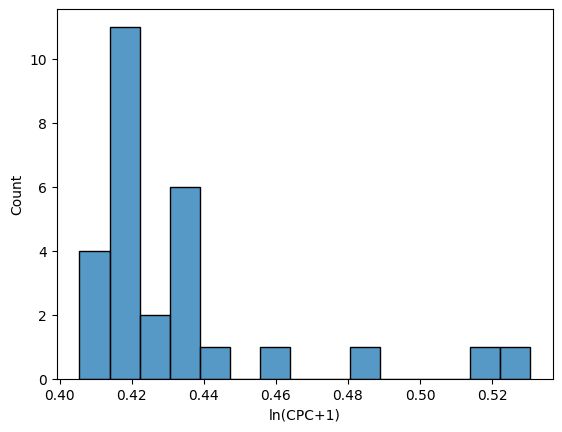

In [20]:
interestData["ln(CPC+1)"] = interestData["CPC (USD)"].apply(
    lambda x: x + 1).apply(math.log)

stdev = statistics.stdev(interestData["ln(CPC+1)"])
mean = statistics.mean(interestData["ln(CPC+1)"])

print(f"Mean cost per click (USD): {statistics.mean(interestData['CPC (USD)'])}. Standard deviation: {statistics.stdev(interestData['CPC (USD)'])}")

interestZScore["CPC (USD)"] = interestData["ln(CPC+1)"].apply(
    lambda x: getZScore(mean, stdev, x))

sns.histplot(data = interestData, x = "ln(CPC+1)")

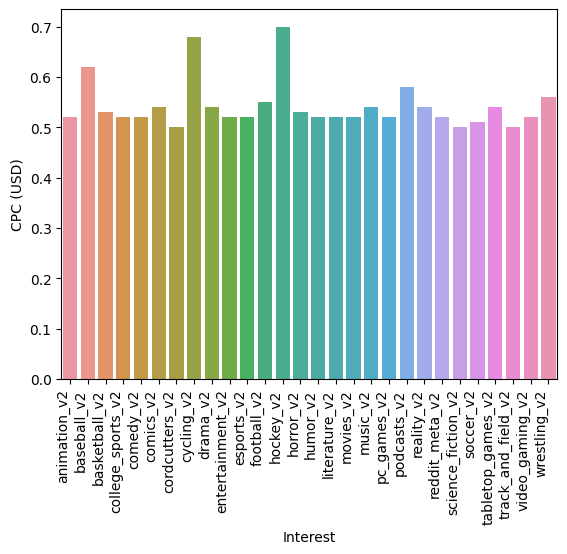

In [21]:
ax = sns.barplot(data = interestData, x = "Interest", y = "CPC (USD)")

ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

# cpcSet = set()
# # print(mean, stdev)
# coeff = 3 # 1 ~ 68, 2 ~ 95, 3 ~ 99.7
# for i in range(0, len(interestData)):
#     if (interestZScore.iloc[i]["CPC (USD)"] < coeff):
#         print(f"Interest: {interestData.iloc[i]['Interest']}.", end = ' ')
#         print(f"Impressions: {interestData.iloc[i]['Impressions']}", end = ' ')
#         print(f"CPC: {interestData.iloc[i]['CPC (USD)']}")
#         cpcSet.add(interestData.iloc[i]['Interest'])
# print(cpcSet)

Focusing on Cost Per Click (CPC), we again observe a strong right skewness in the data, and apply a logarithmic transformation to attempt to remedy this. However, even afterwards, there is a strong right skew. Therefore, the previous strategy to identify significant relationships between impressions and interests will not work. Visually, we can see that **baseball, cycling, and hockey** have higher costs per click than every other interest, whose cost per click is around 0.5 USD. Below is a slice of the dataset with just these interests.

In [22]:
(interestData[interestData["Interest"].isin(["baseball_v2",
                                            "cycling_v2",
                                            "hockey_v2"])])

,Interest,Impressions,eCPM,Clicks,CPC (USD),CTR,Amount Spent (USD),ln(Impressions),ln(CPC+1)
1,baseball_v2,24756,0.98,39,0.62,0.001575,24.353416,10.116823,0.482426
7,cycling_v2,20488,0.96,29,0.68,0.001415,19.593568,9.927595,0.518794
12,hockey_v2,18305,1.15,30,0.70,0.001639,21.074709,9.814930,0.530628


## Click Through Rate

Mean click through rate: 0.0016140969364438213. Standard deviation: 0.00011582973473758866


<Axes: xlabel='CTR', ylabel='Count'>

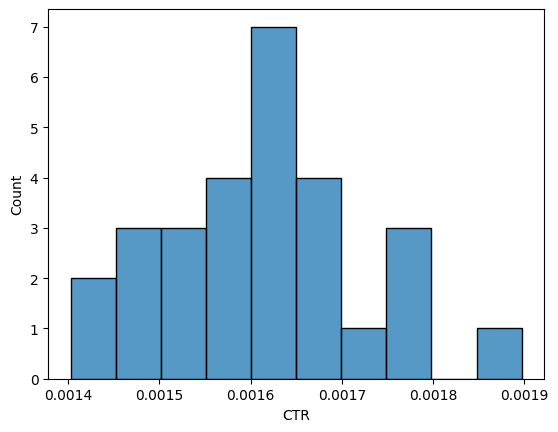

In [23]:
interestData["ln(CTR)"] = interestData["CTR"].apply(math.log)

stdev = statistics.stdev(interestData["ln(CTR)"])
mean = statistics.mean(interestData["ln(CTR)"])

print(f"Mean click through rate: {statistics.mean(interestData['CTR'])}. Standard deviation: {statistics.stdev(interestData['CTR'])}")

interestZScore["CTR"] = interestData["ln(CTR)"].apply(
    lambda x: getZScore(mean, stdev, x))

sns.histplot(data = interestData, x = "CTR", bins = 10)

Interest: esports_v2. CTR: 0.0017844585335753 Impressions: 359773. Cost: 335.194478.
Interest: movies_v2. CTR: 0.0017843991838607 Impressions: 414145. Cost: 382.036012.
Interest: pc_games_v2. CTR: 0.0017408644912001 Impressions: 434267. Cost: 389.350427.
Interest: science_fiction_v2. CTR: 0.0017880230947046 Impressions: 280757. Cost: 248.513343.
Interest: soccer_v2. CTR: 0.0018969179137145 Impressions: 185037. Cost: 179.022684.
{'science_fiction_v2', 'movies_v2', 'esports_v2', 'soccer_v2', 'pc_games_v2'}


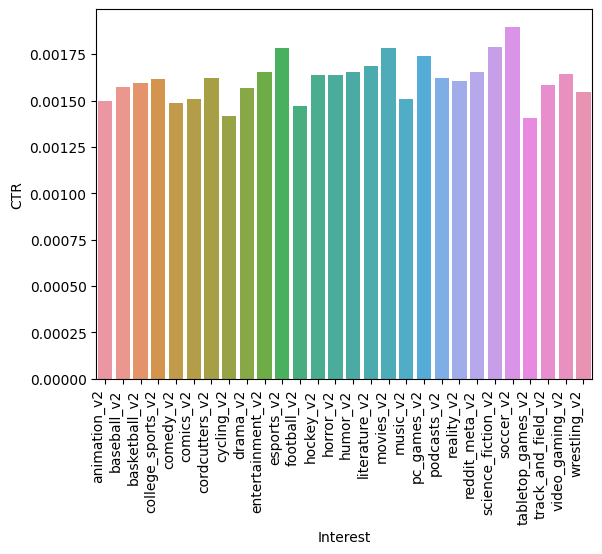

In [24]:
ax = sns.barplot(data = interestData, x = "Interest", y = "CTR")

ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

# print(mean, stdev)
coeff = 1
ctrSet = set()
for i in range(0, len(interestData)):
    if (interestZScore.iloc[i]["CTR"] > coeff):
        print(f"Interest: {interestData.iloc[i]['Interest']}.", end = ' ')
        print(f"CTR: {interestData.iloc[i]['CTR']}", end = ' ')
        print(f"Impressions: {interestData.iloc[i]['Impressions']}.", end = ' ')
        print(f"Cost: {interestData.iloc[i]['Amount Spent (USD)']}.")
        ctrSet.add(interestData.iloc[i]['Interest'])

print(ctrSet.intersection(ctrSet))

Finally, we consider Click Through Rate (CTR). Again, observing a slight right skewness, we apply a logarithmic translation onto the data then calculate the z-score. The following interests are 1 standard deviation above the mean:

* Esports | 0.0018 CTR | 359,773 Impressions | Cost: 335.19 USD
* Movies | 0.0018 CTR | 414,145 Impressions | Cost: 382.04 USD
* PC Games | 0.0017 CTR | 434,267 Impressions | Cost: 389.35 USD
* Science Fiction | 0.0018 CTR | 280,757 Impressions | 248.51 USD
* Soccer | 0.0019 CTR | 185,037 Impressions | Cost: 179.02 USD

The interests that have a high number of impressions and a high click through rate are:

* Movies | 0.0018 CTR | 414,145 Impressions | Cost: 382.04 USD
* PC Games | 0.0017 CTR | 434,267 Impressions | Cost: 389.35 USD


# Analyzing country data

We apply the same strategy to understand the data organized by country as we did when the data was organized by interest, to understand if there is a relationship between the three metrics we focus on (impressions, cost per click, click through rate) and the country the ads are shown in. Because there are so many countries listed in this dataset, the barplots only show countries where more than 10 USD have been spent on advertising for legibility. However, the analysis is performed on the full dataset.

In [25]:
countryData = pd.read_csv("stats by country.csv")
countryData = countryData.drop(["Campaign Name", "Ad Group Name", "Ad Name"], axis = 1)
countryData["Amount Spent (USD)"] = countryData["Amount Spent (USD)"].apply(lambda x: float(x))

# Pandas accidentally turned "NA" into a NaN
countryData.fillna(value = "NA", inplace = True)

threshold = 10 # in USD. Filtering out countries who have less than threshold in amount spent

countryZScores = pd.DataFrame(data = countryData["Country"], columns = ["Country"])
countryData.head()

,Country,Impressions,eCPM,Clicks,CPC (USD),CTR,Amount Spent (USD)
0,AD,62,1.86,1,0.12,0.016129,0.115528
1,AE,4402,0.48,6,0.35,0.001363,2.123835
2,AF,8,0.00,0,0.00,0.000000,0.000000
3,AG,65,0.00,0,0.00,0.000000,0.000000
4,AI,14,0.00,0,0.00,0.000000,0.000000


## Impressions

Mean # of impressions: 3332.2636815920396. Standard deviation: 3332.2636815920396


<Axes: xlabel='ln(Impressions+1)', ylabel='Count'>

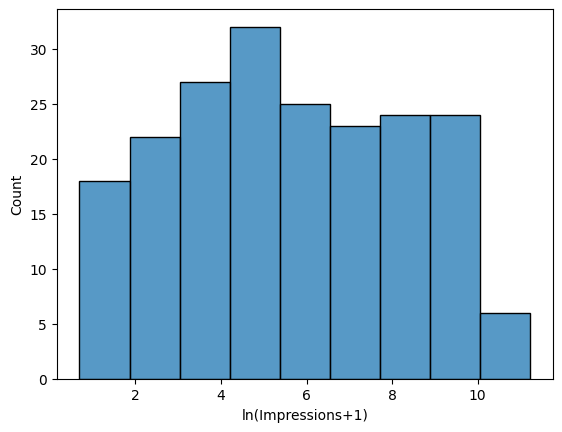

In [26]:
countryData["ln(Impressions+1)"] = countryData["Impressions"].apply(
    lambda x: math.log(x + 1))

mean = statistics.mean(countryData["ln(Impressions+1)"])
stdev = statistics.stdev(countryData["ln(Impressions+1)"])

print(f"Mean # of impressions: {statistics.mean(countryData['Impressions'])}. Standard deviation: {statistics.mean(countryData['Impressions'])}")

# print(mean, stdev)
countryZScores["Impressions"] = countryData["ln(Impressions+1)"].apply(
    lambda x: getZScore(mean, stdev, x)
)

sns.histplot(data = countryData, x = "ln(Impressions+1)")


2.1417902937668534
{'CA'}


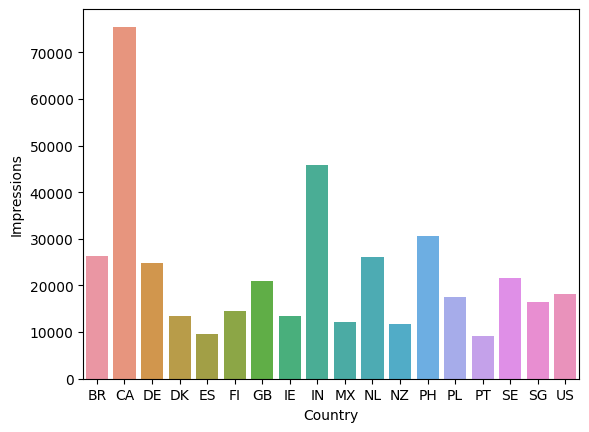

In [27]:
ax = sns.barplot(data = countryData[countryData["Amount Spent (USD)"] >= threshold],
                 x = "Country", y = "Impressions")


coeff = 2
impressionSet = set()


for country in countryData["Country"]:
    # print(country, countryZScores[countryZScores["Country"] == country]["Impressions"].values)
    if (((countryZScores[countryZScores["Country"] == country]["Impressions"].values[0]))
        > coeff):
        impressionSet.add(country)
        print(countryZScores[countryZScores["Country"] == country]["Impressions"].values[0])
        # print(f"Country: {country}.", end = ' ')
        # print(f"Impression: {countryData[countryData['Country'] == country]['Impressions'].values[0]}.", end = ' ')
        # print(f"Cost: {countryData[countryData['Country'] == country]['Amount Spent (USD)'].values[0]}")
print(impressionSet)

"CA" (presumably Canada) has a number of impressions that is two standard deviations above the mean.

## Cost Per Click

Mean cost per click (USD): 0.19462686567164178. Standard deviation: 0.19462686567164178


<Axes: xlabel='ln(CPC+1)', ylabel='Count'>

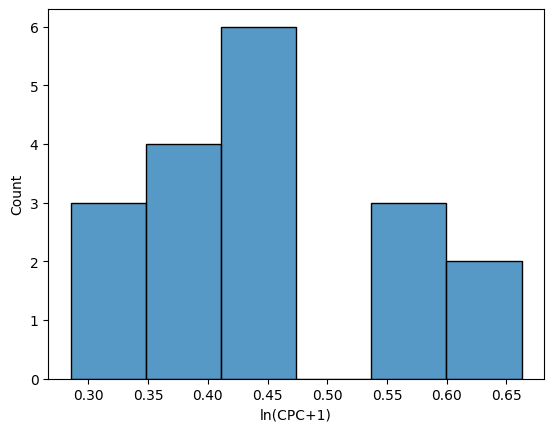

In [28]:
countryData["ln(CPC+1)"] = countryData["CPC (USD)"].apply(
    lambda x: math.log(x + 1)
)

mean = statistics.mean(countryData[countryData["Amount Spent (USD)"] >= threshold]["ln(CPC+1)"])
stdev = statistics.stdev(countryData[countryData["Amount Spent (USD)"] >= threshold]["ln(CPC+1)"])

print(f"Mean cost per click (USD): {statistics.mean(countryData['CPC (USD)'])}. Standard deviation: {statistics.mean(countryData['CPC (USD)'])}")

countryZScores["CPC (USD)"] = countryData["ln(CPC+1)"].apply(
    lambda x: getZScore(mean, stdev, x)
)

sns.histplot(data = countryData[countryData["Amount Spent (USD)"] >= threshold],
             x = "ln(CPC+1)")

Country: BR. Cost per Click: 0.45 Impressions: 26338.
Country: DK. Cost per Click: 0.48 Impressions: 13395.
Country: IN. Cost per Click: 0.38 Impressions: 45859.
Country: NZ. Cost per Click: 0.5 Impressions: 11834.
Country: PH. Cost per Click: 0.33 Impressions: 30706.
Country: PL. Cost per Click: 0.33 Impressions: 17567.
Country: SG. Cost per Click: 0.5 Impressions: 16532.


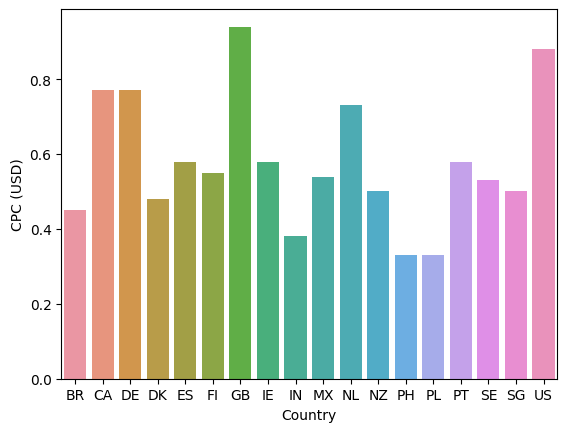

In [29]:
ax = sns.barplot(data = countryData[countryData["Amount Spent (USD)"] >= threshold],
                 x = "Country", y = "CPC (USD)")


coeff = -3
cpcSet = set()


for country in countryData[countryData["Amount Spent (USD)"] >= threshold]["Country"]:
    if (((countryZScores[countryZScores["Country"] == country]["CPC (USD)"].values[0]))
        < coeff * stdev):
        cpcSet.add(country)
        print(f"Country: {country}.", end = ' ')
        print(f"Cost per Click: {countryData[countryData['Country'] == country]['CPC (USD)'].values[0]}", end = ' ')
        print(f"Impressions: {countryData[countryData['Country'] == country]['Impressions'].values[0]}.")
# print(impressionSet)

The following countries have a CPC less than three standard deviations below the average.

* BR | 0.45 CPC | 26,338 Impressions
* DK | 0.48 CPC | 13,395 Impressions
* IN | 0.38 CPC | 45,859 Impressions
* NZ | 0.50 CPC | 11,834 Impressions
* PH | 0.33 CPC | 11,834 Impressions
* PL | 0.33 CPC | 17,567 Impressions
* SG | 0.50 CPC | 16,532 Impressions

## Click Through Rate

Mean click through rate: 0.00263873751412425. Standard deviation: 0.01770337040363879.


<Axes: xlabel='square CTR', ylabel='Count'>

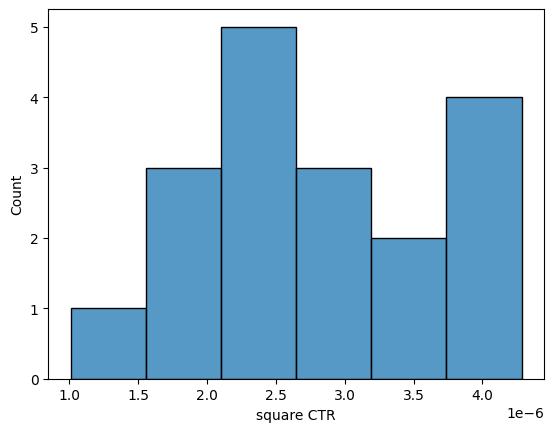

In [30]:
countryData["square CTR"] = countryData["CTR"].apply(lambda x: x ** 2)

mean = statistics.mean(countryData[countryData["Amount Spent (USD)"] >= threshold]["square CTR"])
stdev = statistics.stdev(countryData[countryData["Amount Spent (USD)"] >= threshold]["square CTR"])

print(f"Mean click through rate: {statistics.mean(countryData['CTR'])}. Standard deviation: {statistics.stdev(countryData['CTR'])}.")

countryZScores["CTR"] = countryData["square CTR"].apply(
    lambda x: getZScore(mean, stdev, x)
)

sns.histplot(data = countryData[countryData["Amount Spent (USD)"] >= threshold],
             x = "square CTR")


Country: BR. CTR: 0.0014807502467917. Impressions: 26338.
Country: CA. CTR: 0.00165593620009. Impressions: 75486.
Country: DE. CTR: 0.0012864838787488. Impressions: 24874.
Country: DK. CTR: 0.0015677491601343. Impressions: 13395.
Country: ES. CTR: 0.002065902282822. Impressions: 9681.
Country: FI. CTR: 0.0013122453208094. Impressions: 14479.
Country: GB. CTR: 0.0010054582016661. Impressions: 20886.
Country: IE. CTR: 0.0015503875968992. Impressions: 13545.
Country: IN. CTR: 0.0020279552541485. Impressions: 45859.
Country: MX. CTR: 0.0015607031378347. Impressions: 12174.
Country: NL. CTR: 0.0016805438851119. Impressions: 26182.
Country: NZ. CTR: 0.0017745479127936. Impressions: 11834.
Country: PH. CTR: 0.0014655116263922. Impressions: 30706.
Country: PL. CTR: 0.0018215973131439. Impressions: 17567.
Country: PT. CTR: 0.0020699422595053. Impressions: 9179.
Country: SE. CTR: 0.0020406270290325. Impressions: 21562.
Country: SG. CTR: 0.0013307524800387. Impressions: 16532.
Country: US. CTR: 0

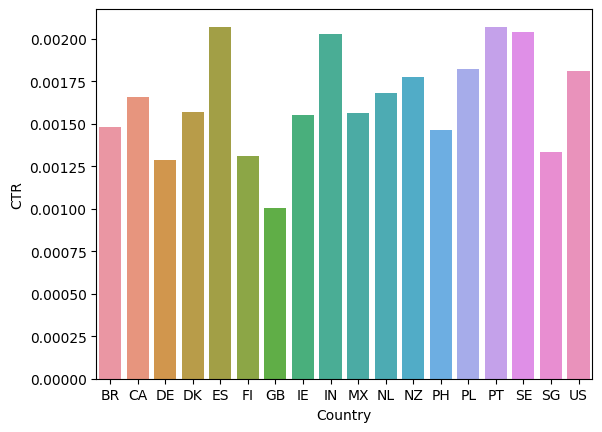

In [31]:
ax = sns.barplot(data = countryData[countryData["Amount Spent (USD)"] >= threshold],
                 x = "Country", y = "CTR")

coeff = 3
ctrSet = set()


for country in countryData[countryData["Amount Spent (USD)"] >= threshold]["Country"]:
    if (((countryZScores[countryZScores["Country"] == country]["CTR"].values[0]))
        < coeff):
        cpcSet.add(country)
        print(f"Country: {country}.", end = ' ')
        print(f"CTR: {countryData[countryData['Country'] == country]['CTR'].values[0]}.", end = ' ')
        print(f"Impressions: {countryData[countryData['Country'] == country]['Impressions'].values[0]}.")
# print(impressionSet)

The following countries have a CTR three standard deviations above the mean.

* BR | 0.0015 CTR | 26,338 Impressions
* CA | 0.0017 CTR | 75,486 Impressions
* DE | 0.0013 CTR | 24,874 Impressions
* DK | 0.0016 CTR | 13,395 Impressions
* ES | 0.0021 CTR | 9,681 Impressions
* FI | 0.0013 CTR | 14,479 Impressions
* GB | 0.0010 CTR | 20,886 Impressions
* IE | 0.0016 CTR | 13,545 Impressions
* IN | 0.0020 CTR | 45,859 Impressions
* MX | 0.0016 CTR | 12,174 Impressions
* NL | 0.0017 CTR | 26,182 Impressions
* NZ | 0.0018 CTR | 11,834 Impressions
* PH | 0.0015 CTR | 30,706 Impressions
* PL | 0.0018 CTR | 17,567 Impressions
* PT | 0.0021 CTR | 9,179 Impressions
* SE | 0.0020 CTR | 21,562 Impressions
* SG | 0.0013 CTR | 16,532 Impressions
* US | 0.0018 CTR | 18,249 Impressions

# Analyzing region data

In [32]:
regionData = pd.read_csv("stats by region.csv")
regionData = regionData.drop(["Campaign Name", "Ad Group Name", "Ad Name"], axis = 1)
regionData["Amount Spent (USD)"] = regionData["Amount Spent (USD)"].apply(lambda x: float(x))
regionZScore = pd.DataFrame(data = regionData["Region"], columns = ["Region"])

threshold = 1 # graph only regions with X amount or more in Amount Spent (USD)

regionData.head()

,Region,Impressions,eCPM,Clicks,CPC (USD),CTR,Amount Spent (USD)
0,AB,12472,1.18,19,0.77,0.001523,14.678553
1,ACT,365,0.00,0,0.00,0.000000,0.000000
2,AK,63,31.75,2,1.00,0.031746,2.000000
3,AL,171,0.00,0,0.00,0.000000,0.000000
4,AR,88,0.00,0,0.00,0.000000,0.000000


## Impressions

Mean # of impressions: 1713.527027027027. Standard deviation: 4423.782507915791


<Axes: xlabel='ln(Impressions)', ylabel='Count'>

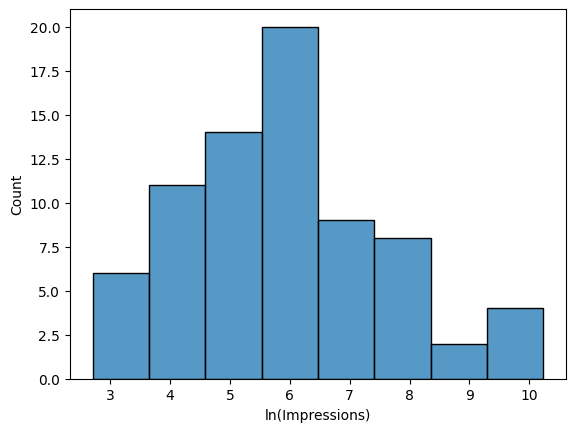

In [33]:
regionData["ln(Impressions)"] = regionData["Impressions"].apply(math.log)

mean = statistics.mean(regionData["ln(Impressions)"])
stdev = statistics.stdev(regionData["ln(Impressions)"])

print(f"Mean # of impressions: {statistics.mean(regionData['Impressions'])}. Standard deviation: {statistics.stdev(regionData['Impressions'])}")

regionZScore["Impressions"] = regionData["ln(Impressions)"].apply(
    lambda x: getZScore(mean, stdev, x)
)

sns.histplot(data = regionData, x = "ln(Impressions)")

Region: AB. Impressions: 12472 Cost: 14.678553
Region: BC. Impressions: 16898 Cost: 23.221482
Region: ENG. Impressions: 16617 Cost: 16.920166
Region: ON. Impressions: 27907 Cost: 32.916437
{'ON', 'ENG', 'AB', 'BC'}


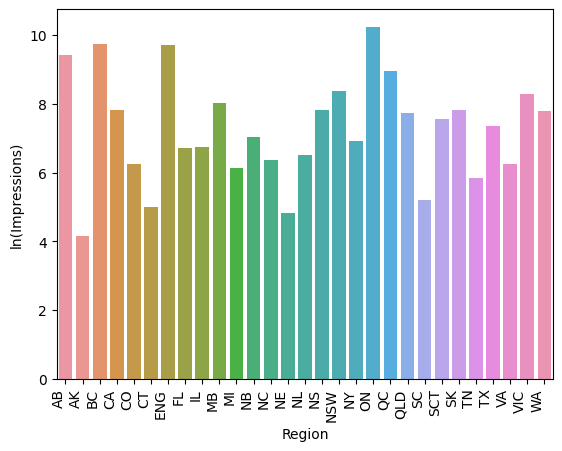

In [34]:
ax = sns.barplot(data = regionData[regionData['Amount Spent (USD)'] >= threshold],
                 x = "Region", y = "ln(Impressions)")

ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

lnImpressionSet = set()
# print(mean, stdev)
coeff = 2 # 1 ~ 68 percentile, 2 ~ 95 percentile, 3 ~ 99.7 percentile
for i in range(0, len(regionData)):
    if (regionZScore.iloc[i]["Impressions"] > coeff):
        print(f"Region: {regionData.iloc[i]['Region']}.", end = ' ')
        print(f"Impressions: {regionData.iloc[i]['Impressions']}", end = ' ')
        print(f"Cost: {regionData.iloc[i]['Amount Spent (USD)']}")
        lnImpressionSet.add(regionData.iloc[i]['Region'])
print(lnImpressionSet)

Observing a strong right skewness in the distribution of impressions across regions, we apply a logarithmic transformation to analyze a more Normal distribution. Focusing on regions that are two standard deviations above the mean, thus in the 95th percentile of number of impressions, these are the following regions:

* AB (Alberta?) | 12,472 Impressions | 14.68 USD
* BC (British Columbia?) | 16,898 Impressions | 23.22 USD
* ENG (?) | 16,617 Impressions | 16.92 USD
* ON (Ontario?) | 27,907 Impressions | 32.92 USD


## Cost Per Click

Mean cost per click (USD): 0.38. Standard deviation: 0.44043564983302114


<Axes: xlabel='CPC (USD)', ylabel='Count'>

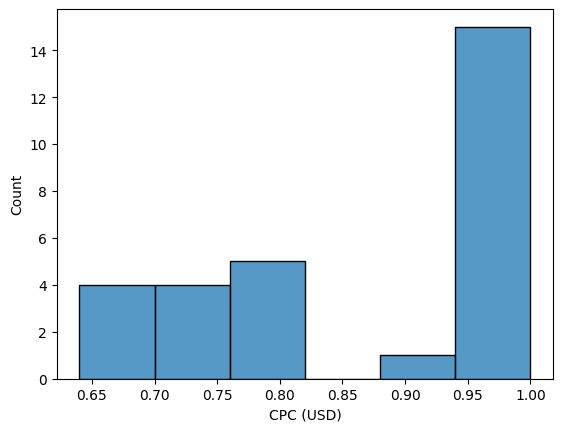

In [35]:
# regionData["ln(CPC+1)"] = regionData["CPC (USD)"].apply(
#     lambda x: x ** 2
# )

mean = statistics.mean(regionData["CPC (USD)"])
stdev = statistics.stdev(regionData["CPC (USD)"])

print(f"Mean cost per click (USD): {mean}. Standard deviation: {stdev}")

# regionZScores["CPC (USD)"] = regionData["ln(CPC+1)"].apply(
#     lambda x: getZScore(mean, stdev, x)
# )

# sns.histplot(data = regionData[regionData["Amount Spent (USD)"] >= threshold],
#              x = "ln(CPC+1)")

sns.histplot(data = regionData[regionData["Amount Spent (USD)"] >= threshold],
             x = "CPC (USD)")

Region: CA. CPC: 0.7. Impressions: 2455. Cost: 4.229308.
Region: NB. CPC: 0.66. Impressions: 1118. Cost: 1.313372.
Region: NL. CPC: 0.64. Impressions: 673. Cost: 3.223679.
Region: SK. CPC: 0.66. Impressions: 2507. Cost: 1.991679.
Region: VIC. CPC: 0.66. Impressions: 3960. Cost: 3.305965.


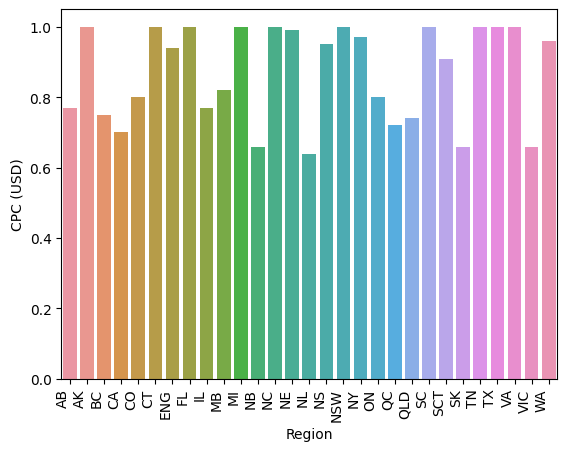

In [36]:
ax = sns.barplot(data = regionData[regionData['Amount Spent (USD)'] >= threshold],
                 x = "Region", y = "CPC (USD)")

ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

# lnImpressionSet = set()
# print(mean, stdev)
coeff = -3 # 1 ~ 68 percentile, 2 ~ 95 percentile, 3 ~ 99.7 percentile
for region in ['CA', 'NB', 'NL', 'SK', 'VIC']:
    row = regionData[regionData['Region'] == region]
    print(f"Region: {region}.", end = ' ')
    print(f"CPC: {row['CPC (USD)'].values[0]}.", end = ' ')
    print(f"Impressions: {row['Impressions'].values[0]}.", end = ' ')
    print(f"Cost: {row['Amount Spent (USD)'].values[0]}.")

# for i in range(0, len(regionData)):
#     if (regionData.iloc[i]["CPC (USD)"] > mean + stdev * coeff):
#         print(f"Region: {regionData.iloc[i]['Region']}.", end = ' ')
#         print(f"CPC: {regionData.iloc[i]['CPC (USD)']}.", end = ' ')
#         print(f"Impressions: {regionData.iloc[i]['Impressions']}", end = ' ')
#         print(f"Cost: {regionData.iloc[i]['Amount Spent (USD)']}")
#         lnImpressionSet.add(regionData.iloc[i]['Region'])
# print(lnImpressionSet)

There is a strong right skewness in the data, so we identify regions with relatively lower cost per click's visually:

* CA | CPC: 0.7 | 2,455 Impressions | 4.23 USD
* NB | CPC: 0.66 | 1,118 Impressions | 1.31 USD
* NL | CPC: 0.64 | 673 Impressions | 3.22 USD
* SK | CPC: 0.66 | 2,507 Impressions | 1.99 USD
* VIC | CPC: 0.66 | 3,960 Impressions | 3.31 USD

The number of impressions from these regions are comparatively quite low, so it's likely there isn't any evidence of a relationship between these regions and a meaningfully lower CPC.

## Click Through Rate

Mean cost per click (USD): 0.0017208262870974256. Standard deviation: 0.004282960349484864


<Axes: xlabel='CTR', ylabel='Count'>

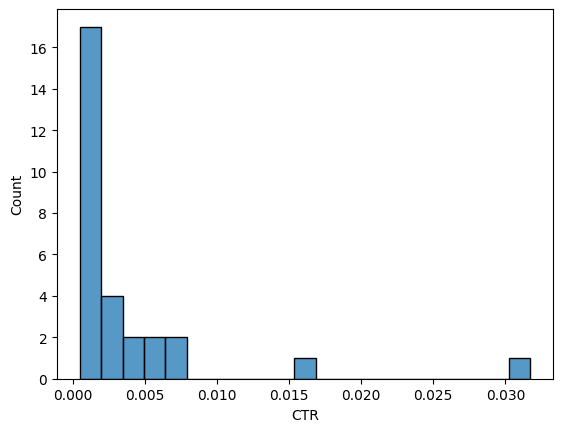

In [38]:
# regionData["ln(CTR+1)"] = regionData["CTR"].apply(
#     lambda x: math.log(x+1)
# )

mean = statistics.mean(regionData["CTR"])
stdev = statistics.stdev(regionData["CTR"])

print(f"Mean cost per click (USD): {mean}. Standard deviation: {stdev}")

# regionZScore["CTR"] = regionData["ln(CTR+1)"].apply(
#     lambda x: getZScore(mean, stdev, x)
# )

# sns.histplot(data = regionData[regionData["Amount Spent (USD)"] >= threshold],
#              x = "ln(CTR+1)")

sns.histplot(data = regionData[regionData["Amount Spent (USD)"] >= threshold],
             x = "CTR")

Region: AK. CTR: 0.0317460317460317. Impressions: 63. Cost: 2.0.
Region: CT. CTR: 0.0068493150684931. Impressions: 146. Cost: 1.0.
Region: NE. CTR: 0.0158730158730158. Impressions: 126. Cost: 1.978239.
Region: NL. CTR: 0.0074294205052005. Impressions: 673. Cost: 3.223679.
Region: SC. CTR: 0.0054644808743169. Impressions: 183. Cost: 1.0.
Region: TN. CTR: 0.0058309037900874. Impressions: 343. Cost: 2.0.


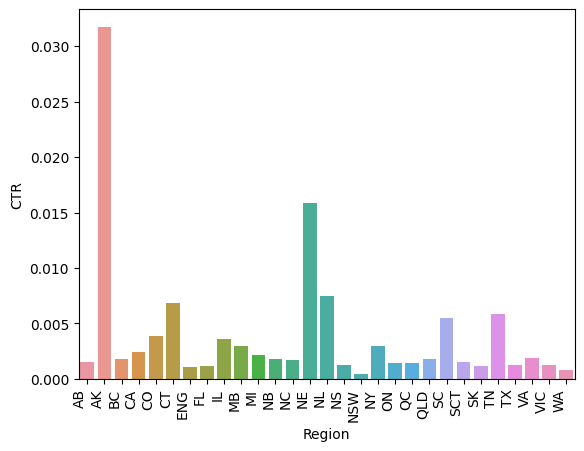

In [39]:
ax = sns.barplot(data = regionData[regionData['Amount Spent (USD)'] >= threshold],
                 x = "Region", y = "CTR")

ax.axes.set_xticklabels(ax.axes.get_xticklabels(),
                              rotation = 90,
                              horizontalalignment = 'right');

# lnImpressionSet = set()
# print(mean, stdev)
# coeff = -3 # 1 ~ 68 percentile, 2 ~ 95 percentile, 3 ~ 99.7 percentile
for region in ['AK', 'CT', 'NE', 'NL', 'SC', 'TN']:
    row = regionData[regionData['Region'] == region]
    print(f"Region: {region}.", end = ' ')
    print(f"CTR: {row['CTR'].values[0]}.", end = ' ')
    print(f"Impressions: {row['Impressions'].values[0]}.", end = ' ')
    print(f"Cost: {row['Amount Spent (USD)'].values[0]}.")

# for i in range(0, len(regionData)):
#     if (regionData.iloc[i]["CTR"] > mean + stdev * coeff):
#         print(f"Region: {regionData.iloc[i]['Region']}.", end = ' ')
#         print(f"CTR: {regionData.iloc[i]['CTR']}.", end = ' ')
#         print(f"Impressions: {regionData.iloc[i]['Impressions']}", end = ' ')
#         print(f"Cost: {regionData.iloc[i]['Amount Spent (USD)']}")
        # lnImpressionSet.add(regionData.iloc[i]['Region'])
# print(lnImpressionSet)

Again, both the raw data and the transformed data exhibit a strong right skewness in their distribution. Thus, we identify regions with a high click through rate visually:

* AK | CTR: 0.032 | 63 Impressions | 2.0 USD
* CT | CTR: 0.007 | 146 Impressions | 1.0 USD
* NE | CTR: 0.016 | 126 Impressions | 1.98 USD
* NL | CTR: 0.007 | 673 Impressions | 3.22 USD
* SC | CTR: 0.005 | 183 Impressions | 1.0 USD
* TN | CTR: 0.006 | 343 Impressions | 2.0 USD
